<a href="https://colab.research.google.com/github/ajsanjoaquin/jesus-russell-obi_wan_kenobi/blob/master/Jesus_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training the Model

Mounted my Google Drive and created project directory.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd fastai-v3


In [0]:
!ls

The git cloning is now unnecessary as Colab now comes with fastai pre-installed.

In [0]:
!git clone https://github.com/fastai/course-v3.git

Defined 3 classes corresponding to the 3 possible labels.

In [0]:
classes=['obi','jesus','russell']

I set up the proper data structure for each labels and added the CSV files containing the image URLs.

In [0]:
from fastai.vision import *
folder= "obi"
file="urls_obi.csv"
path = Path(base_dir+'Proj1/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/folder/file,dest,max_pics=200)

In [0]:
folder= "jesus"
file="urls_jesus.csv"
path = Path(base_dir+'Proj1/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/folder/file,dest,max_pics=200)

In [0]:
folder= "russell"
file="urls_russell.csv"
path = Path(base_dir+'Proj1/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/folder/file,dest,max_pics=200)

The for-loop was meant to clean any broken URLs. I then set up the DataBunch to be used.

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Sanity checks by showing the classes and a sample of the images.

In [0]:
data.classes

['jesus', 'obi', 'russell']

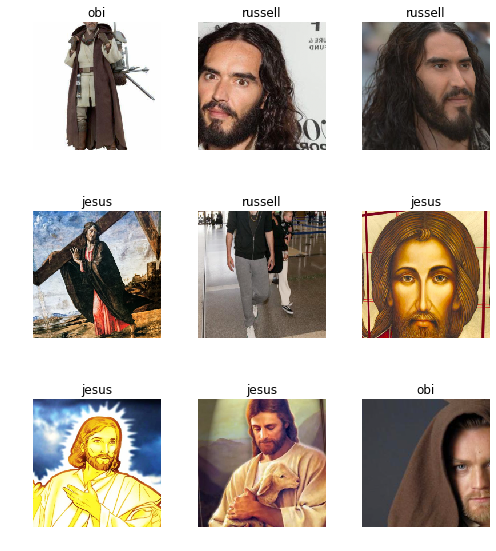

In [0]:
data.show_batch(rows=3, figsize=(7,8))

Fastai automatically splits the dataset into training and validation sets as specified in the DataBunch parameter. Total number of images is **469**.

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['jesus', 'obi', 'russell'], 3, 376, 93)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/Proj1/data/obi'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Proj1/data/jesus'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Proj1/data/russell')]

Downloading pre-trained Resnet 34 model.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83109079.92it/s]


Learned for one cycle as recommended by the first fastai lesson.

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.223780,0.584308,0.204301,00:10
1,0.791323,0.253745,0.064516,00:07
2,0.573787,0.194348,0.064516,00:07
3,0.457640,0.181425,0.064516,00:07


Save checkpoint.

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


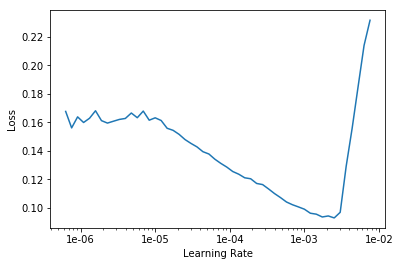

In [0]:
learn.recorder.plot()

Continue fine-tuning the model with the learning rate based on the lowest slope visible on the graph above.

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.724104,40.678596,0.591398,00:07
1,0.672605,182.383240,0.709677,00:08


In [0]:

learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.539707,4.869949,0.344086,00:08
1,0.448449,0.808637,0.182796,00:08


Error rate was decreasing but I felt I could have done better, so I reloaded checkpoint 1 to start over.

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


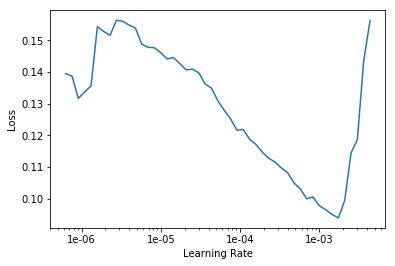

In [0]:
learn.recorder.plot()

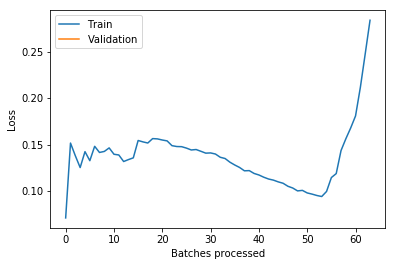

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.184175,0.283953,0.086022,00:08
1,0.140006,0.231783,0.032258,00:08


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

Confusion matrix for results. Those outside the diagonal blue lines show the wrong classifications that model did on the validation set.

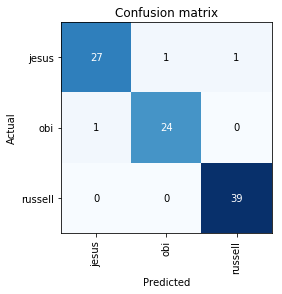

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#Predicting with the Model

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
path

PosixPath('/content/gdrive/My Drive/fastai-v3/Proj1/data')

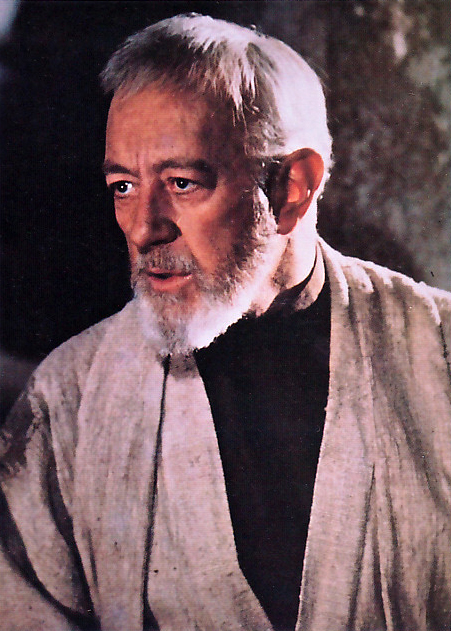

In [0]:
img = open_image(path/'kenobi.jpg')
img

In [0]:
learn=load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category obi